# Introduction to Numpy

Numpy is a library for defining and making computations on arrays. The data type it is based on is called 
*ndarrays* and sort of replaces *lists* that you may be used to from before. It is much more efficient to compute with this array-type than with lists.

If you have not already installed numpy on your computer, try to remove the # in the cell below.


In [83]:
#!pip install numpy

## Getting started
The first thing you need to do in order to make use of numpy is of course the import this module.
One way of doing that is to execute the command below. The short name *np* is a very standard alias to use.

In [84]:
import numpy as np

Now you are ready to do more interesting things. The first function we want to consider is called *array* and it simply defines an instance of *ndarray*.

Below, we define and print a vector b and then we check what kind of data type b is, and then we look at its dimension.

In [85]:
# Define b
b = np.array([1,2,3,4])
# Print out b
print(b)
print(type(b)) # We now check what data type b really is
print(b.shape) # the shape of B should be (4,)
print(b.size)  # and we should learn that it has 4 elements

[1 2 3 4]
<class 'numpy.ndarray'>
(4,)
4


We now define a matrix with the following syntax:

In [86]:
A = np.array([[1,1,1,1],[1,-1,1,-1],[2,1,2,2],[4,3,2,1]])
print(A)
print(A.shape,A.size,A.ndim)

[[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 2  1  2  2]
 [ 4  3  2  1]]
(4, 4) 16 2


The last print statement output A.shape, that is, each dimension in A, so we see that A is a 4x4-matrix.
A.size gives the number of elements in A (16), and A.ndim=2 because it is a two-dimensional array (a matrix).

A much used matrix is the identity matrix $I$. There is a function for it in numpy called *eye*.
To produce the $5\times 5$ identity matrix we simply type

In [87]:
I5 = np.eye(5)
print(I5)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


One can also make *ndarrays* with more than two indices. 

Some useful functions are *zeros* and *ones* which produce ndarrays filled with 0's or 1's.

In [88]:
N=5
Zm = np.zeros((N,N))

Ov = np.ones((N,))

print(Zm,Ov)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] [1. 1. 1. 1. 1.]


If you need to make a matrix or vector of 0's having the same size as some other already defined matrix (vector), one can use 

In [89]:
Om = np.ones_like(Zm)
Zv = np.zeros_like(Ov)
print(Om,Zv)


[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]] [0. 0. 0. 0. 0.]


When constructing matrices it is sometimes useful to be able to specify diagonals and then let the rest of the matrix consist of zeros. The *diag*-function is useful

In [90]:
N=5
ee=np.ones((N,)) # First define a vector with N ones
T=-2*np.diag(ee) + np.diag(ee[1:],-1) + np.diag(ee[1:],1)
print(T)


[[-2.  1.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  1. -2.]]


This is the well-known "second-derivative matrix" used when numerically solving differential equations.
The first argument to *diag* describes the elements to be placed on the diagonal, whereas the second (integer) argument points to which diagonal we talk about. The integer 0 corresponds to the main diagonal, -1 to the first subdiagonal and +1 to the first superdiagonal. The sub- an superdiagonals have one element less than the main diagonal.

It is easy to solve systems $Ax=b$ with *numpy* once $A$ and $b$ have been defined. Using $A$ as above, and defining a vector $b$ we solve the system as follows:

In [91]:
b = np.array([0.1,0.2,0.2,0.1])

x = np.linalg.solve(A,b)
print(x)

[-7.50000000e-02  2.37904934e-17  2.25000000e-01 -5.00000000e-02]


We can also find eigenvalues and eigenvectors with numpy. There are several different functions with slightly different purposes. If, for instance, we just need eigenvalues and not the corresponding eigenvectors, we can write (with $T$ as above)

In [92]:
lam = np.linalg.eigvals(T)
print(lam)

[-3.73205081 -3.         -2.         -0.26794919 -1.        ]


## Specifiy submatrices and extract elements

In *ndarrays*, the indexing starts at 0 and ends at N-1 where N is the number of elements. If one needs to address the last element in an *ndarray*, one can use -1 as an index. 

In [93]:
V = np.array([1,2,3,4,5])
print(V[0])
print(V[-1])

1
5


It is also many times useful to extract a large or small part of an array. If, say, we need the three middle elements (2,3,4) in V above, we write

In [94]:
print( V[1:4])

[2 3 4]


so that generally one has $V[m:n]=[V[m],\ldots,V[n-1]]^T$.
Submatrices can be extracted in a similar way. One can omit the index m if m=0 and similarly, the highest index if it is the last.

In [95]:
print(V[:4])
print(V[1:],"\n")
print(T[1:3,2:4])

[1 2 3 4]
[2 3 4 5] 

[[ 1.  0.]
 [-2.  1.]]


If for instance one is to use Gaussian elimination (LU-factorization) with pivoting, it is useful to be able to e.g. permute the ordering of the rows in a matrix, or to interchange some its rows.
We illustrate this by an example.

In [96]:
A = np.array([[1,1,1,1],[1,-1,1,-1],[2,1,2,2],[4,3,2,1]])
print(A)

[[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 2  1  2  2]
 [ 4  3  2  1]]


Suppose we need to make a new matrix where we have interchanged the rows such that the last row of A is now to be the first and then the rows 0, 1, 2 of the original matrix. 
We define the "permutation vector" P

In [97]:
P=np.array([3,0,1,2])

and then we construct B as follows

In [98]:
B=A[P,:]
print(B)

[[ 4  3  2  1]
 [ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 2  1  2  2]]


## Multiplication of ndarrays
It is important to understand how numpy perceives multiplication between ndarrays.
If one has two arrays of the same shape, for instance two 4x4 matrices, one can use \*, and this means **element-wise multiplication**. This is an operation which is not so much used in linear algebra, but still useful in some contexts. The same can be said about division. If we use / between two ndarrays of the same dimension we get element-wise division. We try this out, using A as above and defining a brand new B.

In [99]:
B=np.array([[1,2,3,2],[2,1,3,3],[1,-1,2,4],[1,3,2,1]])
print("A=\n",A,"\nB=\n",B,"\n")
print("A*B=\n",A*B)

A=
 [[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 2  1  2  2]
 [ 4  3  2  1]] 
B=
 [[ 1  2  3  2]
 [ 2  1  3  3]
 [ 1 -1  2  4]
 [ 1  3  2  1]] 

A*B=
 [[ 1  2  3  2]
 [ 2 -1  3 -3]
 [ 2 -1  4  8]
 [ 4  9  4  1]]


and we see that element-wise multiplication has been used, $(A*B)_{i,j}=A_{i,j}*B_{i,j}$. But as you probably know, this is an entirely different operation than matrix multiplication $A\cdot B$. In order for matrix multiplication to be meaningful we need 
A to be $m\times n$ and B should be $n\times k$. This is results in $A\cdot B$ being $m\times k$. What we need to do in numpy is to use the operator @. 
We try with A and B since we should be OK when both are  $4\times 4$.

In [100]:
print(A@B)

[[ 5  5 10 10]
 [-1 -3  0  2]
 [ 8  9 17 17]
 [13 12 27 26]]


We can also find powers of matrices whenever defined, for instance 
 $A^2$ can be computed by means of the function *matrix_power*

In [101]:
C = np.linalg.matrix_power(A,2)
print(C)

[[ 8  4  6  3]
 [-2  0  0  3]
 [15  9 11  7]
 [15  6 13  6]]


One could also imagine to put the power equal to -1 for the inverse, but there is a dedication function
*inv* for this purpose

In [102]:
C=np.linalg.inv(A)
print(C)

[[-2.75000000e+00 -2.50000000e-01  1.00000000e+00  5.00000000e-01]
 [ 2.00000000e+00 -0.00000000e+00 -1.00000000e+00 -3.17206578e-17]
 [ 3.25000000e+00  7.50000000e-01 -1.00000000e+00 -5.00000000e-01]
 [-1.50000000e+00 -5.00000000e-01  1.00000000e+00  3.96508223e-17]]


If we need to compute the standard inner product between two vectors of the same length, say
 $u$ and $v$, we can write this as a ``matrix multiplication'' $u^Tv$ if we consider $u$ and $v$ as $n\times 1$-matrices. Then it is useful to invoke the function *transpose*, we can write it like this

In [103]:
u=np.array([1,2,3,4])
v=np.array([1,1,1,1])
print(u.transpose()@v)

10


This "method" called transpose is rather handy, if for instance the transpose of matrix  A is needed, we can obtain it as A.transpose().

## Some additional useful functions
The two functions linspace and logspace are useful for example when generating points for a plot.
linspace(a,b,N) defines values from (including) a to (including) b with equal distance (b-a)/N between two consecutive points.

In [104]:
print(np.linspace(0,1,11))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Here we have defined an array with values $\frac{k}{10},\ k=0,\ldots,10$. Similarly, we can make a vector whose elements have equal logarithmic distance between $10^m$ and $10^n$.

In [105]:
print(np.logspace(-4, -1, 4))

[0.0001 0.001  0.01   0.1   ]


The 10-logarithm of these points have equal distances.

Standard mathematical functions such as $\sin x$, $\cos x$, $\log x$, $\exp(x)$ etc exist in several different modules, including numpy, so they can be used when prefixed with np.
Let us plot the sin-function just to check it out.

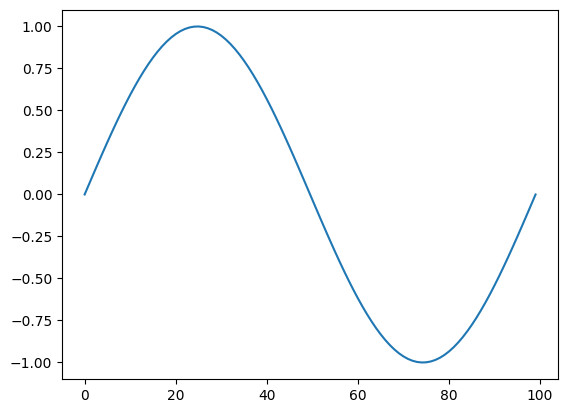

In [108]:
import matplotlib.pyplot as plt
X = np.linspace(0, 2*np.pi, 100)

plt.plot(np.sin(X))
plt.show()

## Dynamical arrays
In many cases when we do calculations on a problem, we know in advance exactly how big the dimension is, i.e. how many array cells we need. In this case, and especially for large arrays, it is a good idea to allocate the whole array a priori rather than increasing the size of the array step by step.
Sometimes this is done by defing a zero-filled array and later overwrite the zeros with other values when needed. The you use the *zeros* function. What you should **not** do (as a rule) is to expand an array dynamically with one cell after the other if the total size of the array is known from the beginning of the program. This leads to a slower code.

But in some cases one actually does not know how big the array is going to be a priori. In this case we may use a function called *append*. We demonstrate it below.

In [ ]:
H=np.array([])
N=5
for n in range(N):
    H=np.append(H,n**2)
    print(H)

[0.]
[0. 1.]
[0. 1. 4.]
[0. 1. 4. 9.]
[ 0.  1.  4.  9. 16.]


This is a simple, but badly chosen example because we knew from the start that the size would be precisely N=5, so we could have allocated a zero-filled array from the beginning. But in more complex programs, for instance a variable stepsize solver for differential equations, it would be impossible to say from the start how many time steps would be needed and this would define the size of the array.


## Important principle when programming with numpy
Part of the reason for making such dedicated tools for computations is to make the programming easy and fast to do. An crucial mistake that beginners sometimes do is to use **for** loops when it is not necessary. It is a good rule (perhaps with some exceptions) to avoid to write **for** loops where the index runs over the elements in an array. Usually, it would then be functions or constructions available to replace such loops. You already saw the functions *zeros*, *ones* and *diag*. These could have been replaced by **for** loops, but it would require more code and be significantly slower. Of course, both knowledge and experience help for knowing which functions are available for these types of operations.


## A somewhat advancerd example
Suppose we want to solve the Poisson equation in two dimensions on a square, say $[0,1]\times [0,1]$, that is

$\displaystyle{
  \frac{\partial^2 u}{\partial x^2} +  \frac{\partial^2 u}{\partial y^2} = f(x,y)},\quad
  x\in(0,1),\ y\in(0,1),
$

where we assume that $u(x,y)=0$ on the boundary of this square.
Vi apply a numerical method, and we use the celebrated five-point formula. One first constructs a
grid with lines $x_m=m/N,\;m=0,\ldots,N$ and $y_n=n/N,\,n=0,\ldots,N$ where $N$ is a chosen integer. We let the interval size be $h=1/N$.
In the point $(x_m,y_n)$ we define $U_{m,n}\approx u(x_m,y_n)$ and we approximate the Poisson equation in such a point using the formula 

$
U_{m,n+1}+U_{m,n-1}+U_{m+1,n}+U_{m-1,n}-4\,U_{m,n} = h^2\, f(x_m,y_n) =: h^2 f_{m,n}
$

This is a linear equation that we can apply for all $(m,n),\ 1\leq m\leq N-1,\ 1\leq n\leq N-1$, so altogether $(N-1)^2$ equations and unknowns. We can now enumerate all these points in the square line by line, 
og stack all $U_{mn}$ into a long vector with $(N-1)^2$ elements. Then the left hand side of the above equation can be represented by a $(N-1)^2\times(N-1)^2$-matrix $A$. 
This is so called penta diagonal (5-diagonal) for all elements are zero except: $A_{i,i}=-4$, $A_{i,i+1}=A_{i+1,i}=1$ and
$A_{i,i+N-1}=A_{i+N-1,1}=1$. If one interprets the 5-point formula as the sum of centered differences for the second derivative in the $x$- og $y$-retning respectively, one can write the matrix as a tensor product

$$
    A = I\otimes B + B\otimes I
$$

where $B$ is the $(N-1)\times(N-1)$-matrix for the second derivative, i.e. $B_{i,i}=-2$, $B_{i,i+1}=B_{i+1,i}=1$, while $I$ is the $(N-1)\times (N-1)$ identity matrix.
In numpy one has the function *kron* which computes the tensor product.  

We can therefore generate the matrix $A$ as follows.

In [ ]:
N=40
B=np.diag(-2*np.ones((N-1,))) + np.diag(np.ones((N-2,)),1) + np.diag(np.ones((N-2,)),-1)
IM = np.eye(N-1)
A = np.kron(B,IM) + np.kron(IM,B)
print(A.shape)

(1521, 1521)


We have to choose a function $f(x,y)$ as well. But before we proceed, we will introduce another useful function from numpy, namely *meshgrid*. This fits perfectly when working with grids.
If we define, for vectors X og Y which contain the grid values in the $x$- and $y$ directions

In [ ]:
X = np.linspace(0,1,5)
Y = np.linspace(0,1,5)
print(X,Y)

[0.   0.25 0.5  0.75 1.  ] [0.   0.25 0.5  0.75 1.  ]


we can introduce 2-dimensional arrays Xv og Yv which represent the whole grid and which keeps the $x$ and $y$ values for the whole grid respectively. We try, and then you will understand

In [ ]:
Xv, Yv = np.meshgrid(X,Y)
print(Xv,"\n\n",Yv)

[[0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]] 

 [[0.   0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25]
 [0.5  0.5  0.5  0.5  0.5 ]
 [0.75 0.75 0.75 0.75 0.75]
 [1.   1.   1.   1.   1.  ]]


There are at least two reasons why this is a smart thing to do. One is that it is now easy to define functions on the grid using "element-wise operations" on Xv and Yv, let us say that we need to represent the function
 $x^2+y^2$, then we can write

In [ ]:
F = Xv*Xv + Yv*Yv

and we have defined $F_{m,n}= X_m^2+Y_n^2$ for all $m$ and $n$. 
The second reason that this is smart is that there are several functions in the matplotlib library which take such 2-dimensional arrays as input for plotting, this is the case for instance for the surface plot function 
*ax.plot_surface*. 

Another useful function is the *reshape* function used to change the shape of an array without changing the data it contains. In the example we just discussed, we saw that it can be useful to represent the unknown U both as a two dimensional array, but also unrolled as a long vector. To go between the two representations, we can use *reshape*. Let us illustrate the use through an example. We first define a long vector with the *arange* function from numpy that can make sequences of integers. In its simplest form:

In [ ]:
V = np.arange(25)
print(V)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


This clearly has 25 elements, so we change it into a $5\times 5$ matrix with *reshape*

In [ ]:
M = np.reshape(V,(5,5))
print(M)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


So here we reproduced the same values row-wise in a matrix. If we were to do it column-wise instead, we could have used an additional argument to *reshape*

In [ ]:
M1 = np.reshape(V,(5,5),'F')
print(M1)

[[ 0  5 10 15 20]
 [ 1  6 11 16 21]
 [ 2  7 12 17 22]
 [ 3  8 13 18 23]
 [ 4  9 14 19 24]]


Finally, we produce a surface plot of the computed solution to the Poisson equation

In [ ]:
h=1./N
X=np.linspace(0,1,N+1)
Y=np.linspace(0,1,N+1)
Xv, Yv = np.meshgrid(X,Y)
bm = h**2*(-np.sin(np.pi*Xv[1:N,1:N])*np.sin(np.pi*Yv[1:N,1:N]))
b=np.reshape(bm,((N-1)**2,))
Z=np.linalg.solve(A,b)
U=np.reshape(Z,(N-1,N-1))

print(U.shape)


(39, 39)


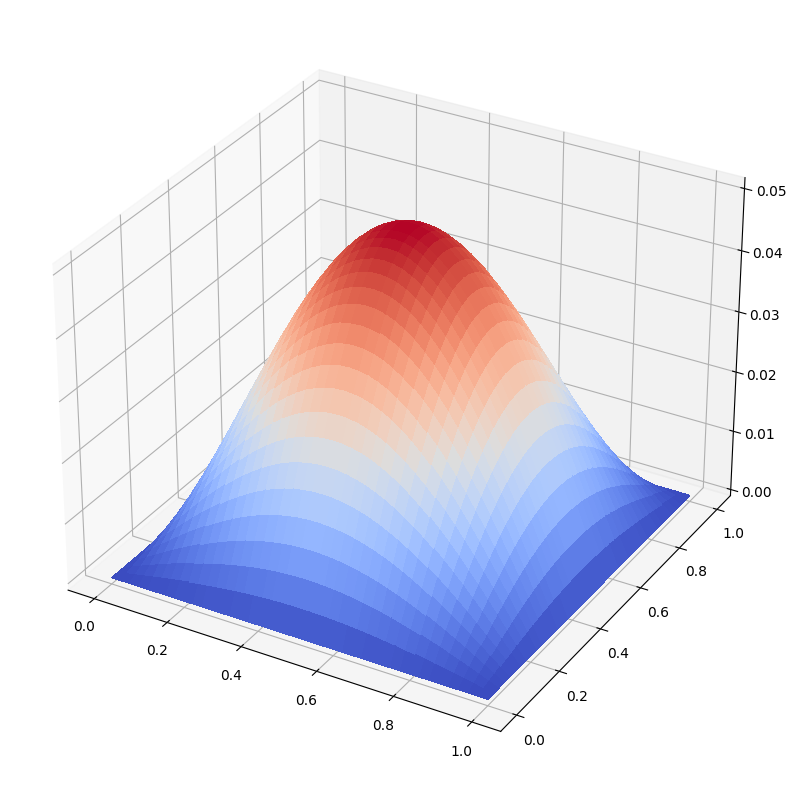

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

Ub=np.zeros((N+1,N+1))
Ub[1:N,1:N] = U

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(Xv, Yv, Ub, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.set_size_inches(10, 10)
plt.show()
